In [1]:
import glob, os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
# import h5py
import matplotlib.dates as mdates
from matplotlib import cm
from datetime import datetime, date, timedelta
from scipy.signal import savgol_filter


In [2]:
pklpath = '../DataBase/PAM_pickle/Taoyuan/2023/Taoyuan_120812-122615-5min.pkl'
windpath = '/Volumes/home/DataBase/Wind_record_CWA/467050/467050-202312_wind.csv'
sunpath = '../DataBase/Data_CWA/sunset_time_taoyuan2023.csv'
fmin = 200
fmax = 1000 
cross_month = False

    

In [25]:
file = open(pklpath, 'rb')
array = pickle.load(file)
pkl_freq = array['freq']
pkl_time = array['time']
pkl_50pct = array['50pct']
file.close()

df = pd.read_csv(windpath)
dsun = pd.read_csv(sunpath)
if cross_month:
    windpath_ = '/Volumes/home/DataBase/Wind_record_CWA/467050/467050-202309_wind.csv'
    df_ = pd.read_csv(windpath_)
    df = pd.concat([df, df_], axis=0)

In [26]:
fidx = np.where((pkl_freq>=fmin) & (pkl_freq<=fmax))[0]
pkl_50pct_filter = pkl_50pct[fidx, :]

2023-12-08 12:00:00 2023-12-26 15:55:00


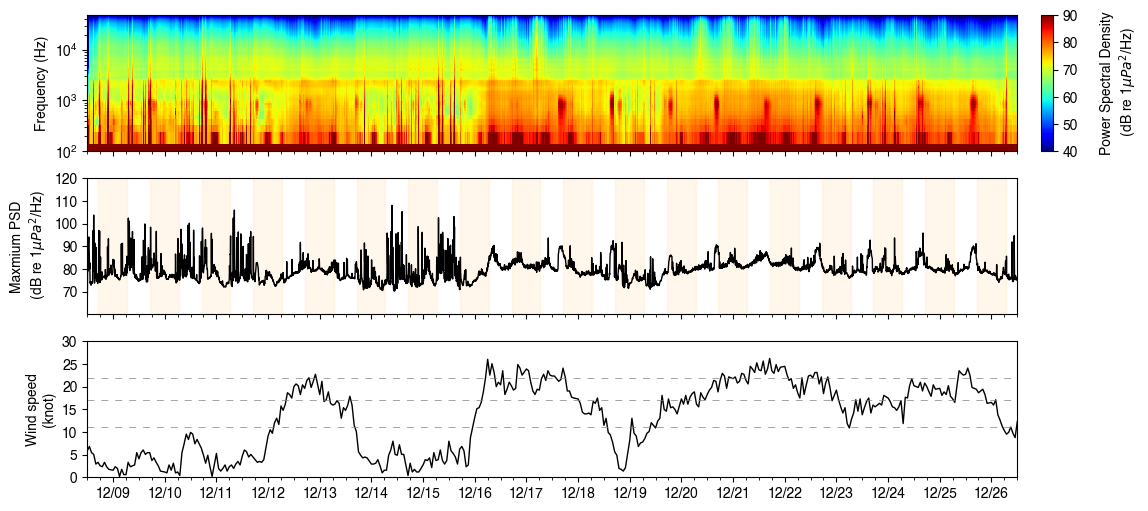

In [35]:
fig, ax = plt.subplots(3,1, figsize=(12,6), sharex=True)
plt.rc('font', family='Helvetica')

plt.subplot(311)
vmin = 40; vmax = 90
cmap = cm.jet
pax = plt.pcolormesh(pkl_time, np.array(pkl_freq), pkl_50pct, cmap=cmap, vmin=vmin, vmax=vmax)
plt.yscale('log')
plt.ylabel('Frequency (Hz)')
plt.ylim(10**2,48000)
cax = fig.add_axes([ax[0].get_position().x1+0.02, ax[0].get_position().y0, 0.01, ax[0].get_position().y1-ax[0].get_position().y0, ])
cbar = plt.colorbar(pax, cax=cax, cmap=cmap, pad=0.2 )
cbar.set_label('\nPower Spectral Density\n (dB re 1'r'$\mu Pa^2$/Hz)')
cbar.set_ticks(range(vmin,vmax+1,10))

ymin=60; ymax=120
ax = plt.subplot(312)
for day in range(8,27,1):
    if day == 32: 
        day = 1; month = 12
    elif day ==33:
        day = 2; month = 12
    else:
        month = 12
        
    if day != 31:
        sunset_hr = int((dsun['SUNSET'][dsun['TIME']==f'2023/{str(month)}/{str(day)}'].values[0]).rsplit(':')[0])
        sunset_min = int((dsun['SUNSET'][dsun['TIME']==f'2023/{str(month)}/{str(day)}'].values[0]).rsplit(':')[-1])
        sunrset_hr = int((dsun['SUNRSET'][dsun['TIME']==f'2023/{str(month)}/{str(day+1)}'].values[0]).rsplit(':')[0])
        sunrset_min = int((dsun['SUNRSET'][dsun['TIME']==f'2023/{str(month)}/{str(day+1)}'].values[0]).rsplit(':')[-1])
        plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,sunset_hr,sunset_min), x2=datetime(2023,month,day+1,sunrset_hr,sunrset_min), 
                          color='orange', alpha=0.08)
    else:
        sunset_hr = int((dsun['SUNSET'][dsun['TIME']==f'2023/{str(month)}/{str(day)}'].values[0]).rsplit(':')[0])
        sunset_min = int((dsun['SUNSET'][dsun['TIME']==f'2023/{str(month)}/{str(day)}'].values[0]).rsplit(':')[-1])
        sunrset_hr = int((dsun['SUNRSET'][dsun['TIME']==f'2023/9/1'].values[0]).rsplit(':')[0])
        sunrset_min = int((dsun['SUNRSET'][dsun['TIME']==f'2023/9/1'].values[0]).rsplit(':')[-1])
        plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,sunset_hr,sunset_min), x2=datetime(2023,9,1,sunrset_hr,sunrset_min), 
                          color='orange', alpha=0.08)
        
plt.plot(pkl_time, np.max(pkl_50pct_filter, axis=0), 'k', lw=1)
print(pkl_time[0], pkl_time[-1])
xmin = datetime(2023,12,8,12,0,0)
xmax = datetime(2023,12,26,12,0,0) #pkl_time[-1]
plt.xlim(xmin, xmax)#datetime(2023, 12, 26, 18, 0)) ##
plt.ylim(ymin, ymax)
plt.ylabel('Maxmium PSD\n (dB re 1'r'$\mu Pa^2$/Hz)')
plt.yticks(range(70,120+1,10))

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))   #to get a tick every 15 minutes


ax = plt.subplot(313)

    
plt.plot(pd.to_datetime(df['time']), df['speed_kt'], 'k', lw=1)
# 六級風
plt.hlines(xmin=pkl_time[0], xmax=pkl_time[-1], y= 22, ls=(0,(10,10)), lw=0.5, color='grey')
# plt.fill_betweenx(y=[22,27], x1=pkl_time[0], x2=pkl_time[-1], ls=(0,(10,10)), lw=0.5, color='grey', alpha=0.3)
# 五級風
plt.hlines(xmin=pkl_time[0], xmax=pkl_time[-1], y= 17, ls=(0,(10,10)), lw=0.5, color='grey')
# plt.fill_betweenx(y=[17,21.9], x1=pkl_time[0], x2=pkl_time[-1], ls=(0,(10,10)), lw=0.5, color='grey', alpha=0.2)
# 四級風
plt.hlines(xmin=pkl_time[0], xmax=pkl_time[-1], y= 11, ls=(0,(10,10)), lw=0.5, color='grey')
# plt.fill_betweenx(y=[11,16.9], x1=pkl_time[0], x2=pkl_time[-1], ls=(0,(10,10)), lw=0.5, color='grey', alpha=0.1)
plt.ylim(0, 30)
plt.ylabel('Wind speed\n(knot)')
plt.yticks(range(0, 31, 5))

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))   #to get a tick every 15 minutes

filetime = (pklpath.rsplit('_')[-1]).rsplit('-',1)[0]
savepath = '/Users/tong/Documents/09_IONTU/ForCF/海保署報告/Figure'
plt.savefig(f'{savepath}/Taoyuan_wind_compare.pdf', dpi =200, bbox_inches='tight')
plt.savefig(f'{savepath}/Taoyuan_wind_compare.png', dpi =200, bbox_inches='tight')

# plt.savefig(f'../Results/spectrogram/Compare_wind/Taoyuan_{filetime}.png', dpi=200)
# plt.savefig(f'../Results/spectrogram/Compare_wind/Taoyuan_{filetime}.pdf', dpi=200)

In [89]:
13.8/0.5144

26.82737169517885

In [4]:
windpath = '/Volumes/home/DataBase/Wind_record_CWA/466940'
alldf = pd.DataFrame()
for filepath in glob.glob(f'{windpath}/*'):
    df = pd.read_csv(filepath)
    alldf = pd.concat([alldf, df])
    
    print(filepath)
    

/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202101_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202102_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202103_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202104_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202105_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202106_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202107_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202108_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202109_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202110_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202111_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202112_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202201_wind.csv
/Volumes/home/DataBase/Wind_record_CWA/466940/466940-202202_wind.csv
/Volumes/home/DataBase/Wind_record

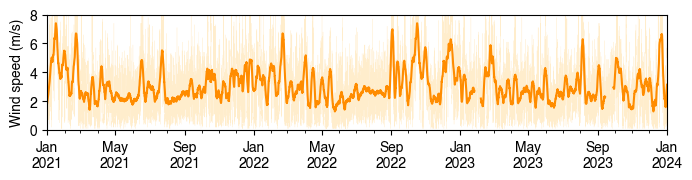

In [50]:
from scipy.signal import savgol_filter
fig, ax = plt.subplots(1,figsize=(8,1.5))
plt.rc('font', family='Helvetica')
plt.plot(pd.to_datetime(alldf['time']), alldf['speed_ms'], lw=0.2, color='orange', alpha=0.2)
plt.plot(pd.to_datetime(alldf['time']), savgol_filter(alldf['speed_ms'],24*10, polyorder=2), lw=1.5,color='darkorange')
plt.xlim(datetime(2021,1,1), datetime(2024,1,1))
plt.ylim(0,8)
plt.ylabel('Wind speed (m/s)')
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))

In [12]:
alldf

,time,speed_ms,speed_kt,direction
0,2021-01-01 00:00:00,1.1,2.138414,330.0
1,2021-01-01 01:00:00,1.8,3.499222,190.0
2,2021-01-01 02:00:00,1.3,2.527216,170.0
3,2021-01-01 03:00:00,0.1,0.194401,0.0
4,2021-01-01 04:00:00,0.5,0.972006,50.0
...,...,...,...,...
685,2024-06-30 18:00:00,NaN,NaN,NaN
686,2024-06-30 19:00:00,NaN,NaN,NaN
687,2024-06-30 20:00:00,NaN,NaN,NaN
688,2024-06-30 21:00:00,NaN,NaN,NaN
